# Holt's Linear Trend Method

In [154]:
from statsmodels.tsa.api import Holt
from sklearn.metrics import root_mean_squared_error
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [155]:
air = pd.read_csv('AirPassengers.csv',index_col=0)

<Axes: xlabel='Month'>

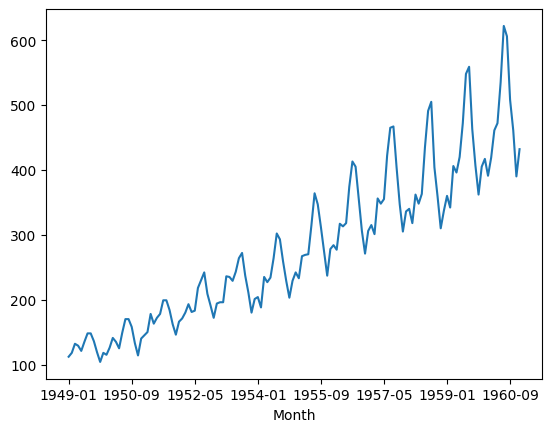

In [174]:
y = air['Passengers']
y.plot()

In [157]:
y_train = y[:132]
y_test = y[132:]
y_train.shape, y_test.shape

((132,), (12,))

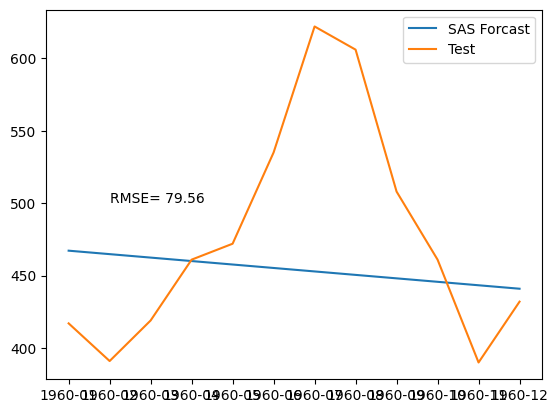

In [158]:
holt = Holt(y_train)
alpha, beta = 0.2, 0.4
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))


holt = pd.Series(fcast1, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(holt, label = 'SAS Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# Holt's Exponential Trend Method 

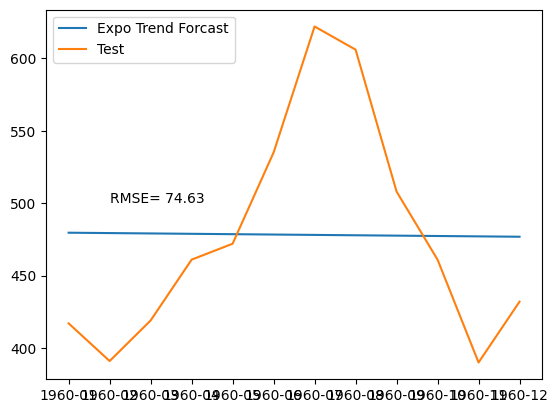

In [159]:
holt = Holt(y_train, exponential=True)
alpha, beta = 0.2, 0.4
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))


holt_expo = pd.Series(fcast1, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_expo),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(holt_expo, label = 'Expo Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# Damp Trends
    - Additive Damped Trend
    - Multiplicative Damped Trend

### - Additive Damp Trend

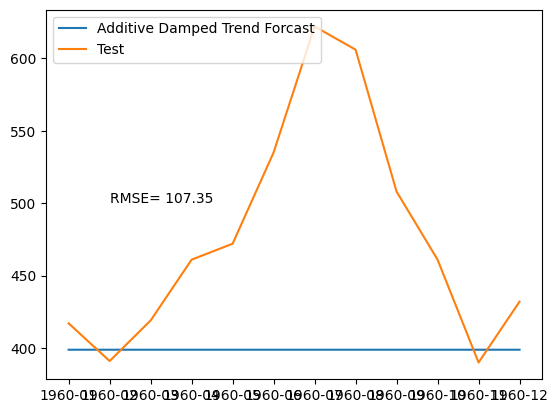

In [161]:
alpha, beta, phi = 0.8, 0.02, 0.1
damp_fcast = Holt(y_train, damped_trend=True)
fit3 = damp_fcast.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=phi)
fcast3 = fit3.forecast(len(y_test))

add_damp_fcast = pd.Series(fcast3, index= y_test.index)
error = round(root_mean_squared_error(y_test, add_damp_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(add_damp_fcast, label = 'Additive Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

### - Multiplicative Damped Trend

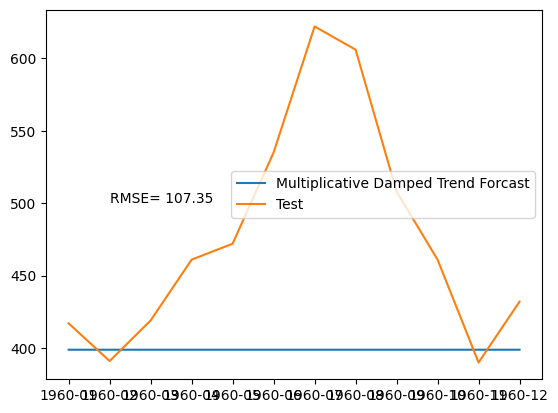

In [173]:
alpha, beta, phi = 0.8, 0.02, 0.1
mul_damp = Holt(y_train, damped_trend=True)
fit4 = mul_damp.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=phi)
fcast4 = fit4.forecast(len(y_test))

mul_damp_fcast = pd.Series(fcast4, index= y_test.index)
error = round(root_mean_squared_error(y_test, mul_damp_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(mul_damp_fcast, label = 'Multiplicative Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# Holt - Winters Trend Method

In [163]:
from statsmodels.tsa.api import ExponentialSmoothing

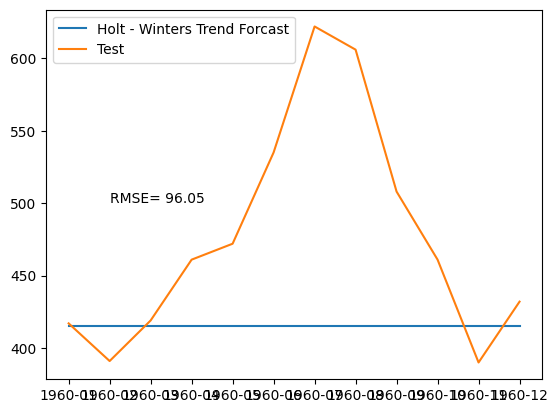

In [164]:
alpha, beta, gamma = 0.1, 0.5, 0.5
holt_winters = ExponentialSmoothing(y_train)
fit4 = holt_winters.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast4 = fit4.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast4, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(holt_winters_fcast, label = 'Holt - Winters Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

### - Additive Method

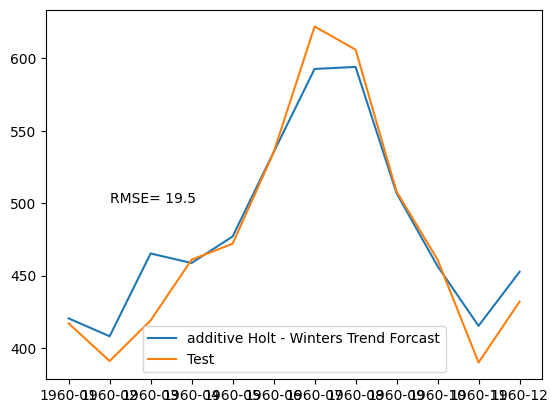

In [165]:
alpha, beta, gamma = 0.2, 0.1, 0.4
holt_winters = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add')
fit4 = holt_winters.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast4 = fit4.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast4, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(holt_winters_fcast, label = 'additive Holt - Winters Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

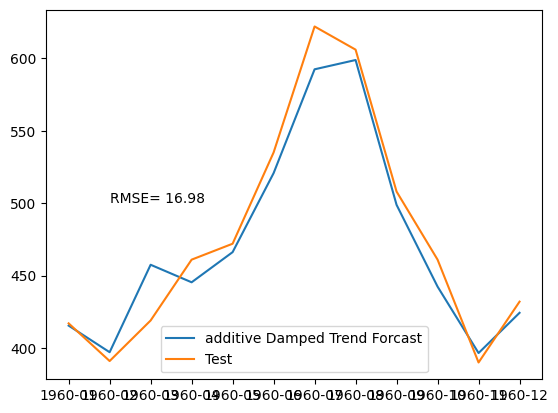

In [166]:
# Without taking alpha, beta, gamma

holt_winters = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add')
fit4 = holt_winters.fit()
fcast4 = fit4.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast4, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(holt_winters_fcast, label = 'additive Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

In [167]:
# Best Parmas
holt_winters.params['smoothing_level'] ,holt_winters.params['smoothing_trend'] ,holt_winters.params['smoothing_seasonal'] 

(0.25115201910803775, 5.511265101309586e-07, 0.7488432944596914)

### - Multiplicative Method

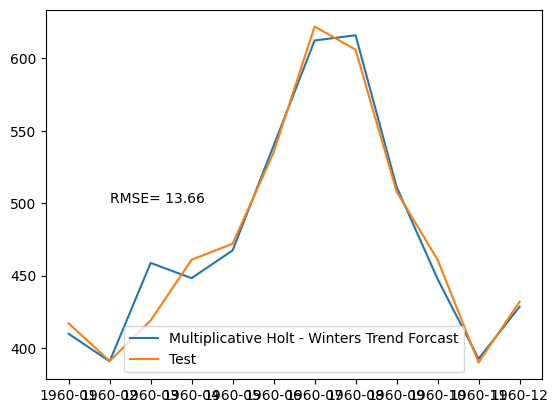

In [168]:
alpha, beta, gamma = 0.2, 0.05, 0.4
holt_winters_mul = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'mul')
fit5 = holt_winters_mul.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast5 = fit5.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast5, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(holt_winters_fcast, label = 'Multiplicative Holt - Winters Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# Damped + Holt's-Winters

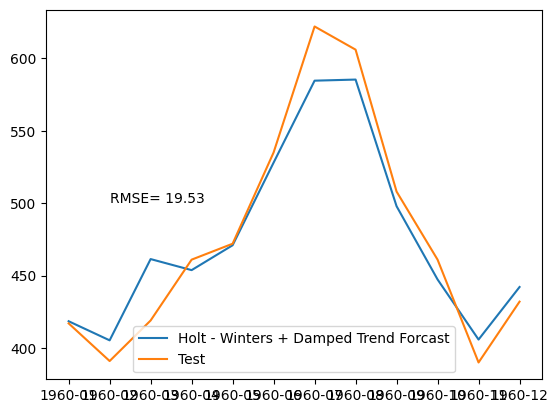

In [169]:
alpha, beta, gamma = 0.2, 0.05, 0.4
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add')
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast6 = fit6.forecast(len(y_test))

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

In [ ]:
alpha, beta, gamma = 0.2, 0.05, 0.4
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'mul')
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast6 = fit6.forecast(len(y_test))

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()